In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Digits\\train.CSV")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.shape

(42000, 785)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
# This dataset have two datasets (train, test), you can use train datset for build model(train dataset divide train_train, train_test)
# Then you can predict test dataset (test dataset is unseen data)

# depedent variable is "label", others are represent image using pixel
# one image represent 28*28 pixel(represent in 784 columns)

In [6]:
data.iloc[3, 1:].values         # this is single row. one byte represent in one pixel 

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 220, 179,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   9,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  28, 247,  17,   0,   0,   0,   

In [7]:
len(data.iloc[3, 1:].values)        # there has 784 values, actually this is two dimention array(it represent image), 
                                    # because image is x*x pixel, therefore we must convert this into two dimension array

784

In [8]:
np.sqrt(len(data.iloc[3, 1:].values))

28.0

In [ ]:
# complete array has 784 values(it represent 28*28 image)

# Visualizing letters

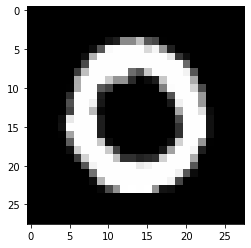

In [9]:
im1 = data.iloc[1, 1:].values
im1.shape = (28, 28)
plt.imshow(im1, cmap = "gray")
plt.show()

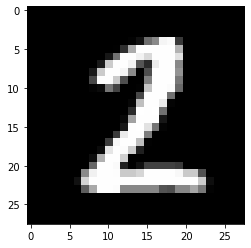

In [14]:
im3 = data.iloc[40000, 1:].values
im3.shape = (28, 28)
plt.imshow(im3, cmap = "gray")
plt.show()

# Machine Learning

In [15]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

0.8501190476190477


# Predictions

In [16]:
y_pred = model.predict(X_test)

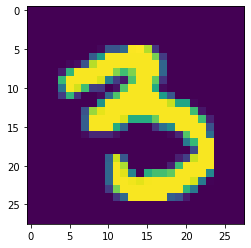

In [18]:
plt.imshow(X_test[0,:].reshape(28,28))
plt.show()

In [19]:
y_test[0]

3

In [20]:
y_pred[0]

3

# Validations

In [21]:
print(accuracy_score(y_pred, y_test))

0.8501190476190477


In [22]:
print(classification_report(y_pred, y_test))      # f1-score is higher in all classes
                                                  # class separable is not there

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       802
           1       0.96      0.94      0.95       977
           2       0.81      0.84      0.83       830
           3       0.81      0.79      0.80       877
           4       0.84      0.84      0.84       825
           5       0.81      0.78      0.79       785
           6       0.88      0.88      0.88       845
           7       0.89      0.88      0.88       913
           8       0.76      0.81      0.78       724
           9       0.81      0.80      0.81       822

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400



In [23]:
confusion_matrix(y_pred, y_test)

array([[736,   1,  11,  10,   3,   3,  16,   4,  11,   7],
       [  1, 918,  15,   6,   6,   5,   1,   7,  16,   2],
       [  9,   8, 698,  30,   6,  12,  10,  18,  28,  11],
       [  8,   5,  30, 696,  11,  50,   8,  15,  30,  24],
       [  7,  10,  11,   7, 695,  11,  17,   9,  15,  43],
       [ 20,   4,  15,  46,   9, 610,  20,  11,  34,  16],
       [ 11,   4,  21,   6,  20,  24, 744,   0,  12,   3],
       [  3,   2,  21,  22,  13,   5,   7, 801,  11,  28],
       [  7,   8,  24,  24,  25,  14,  11,   8, 584,  19],
       [ 11,   1,  14,  16,  39,  22,   7,  26,  27, 659]], dtype=int64)

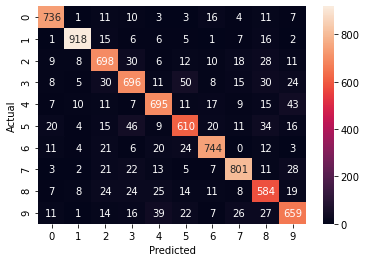

In [24]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt = "g")          # {fmt = "g"} for remove sciencetific number
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
model.predict(X_test[100].reshape(1, 784))           # because one row in a one diamention array but these model work with two dimension array, therefore we must need to transform it to two diamension array

array([6], dtype=int64)

# Appying for unseen data

In [27]:
new_data = pd.read_csv("Digits\\test.CSV")
new_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# this dataset hasn't label column

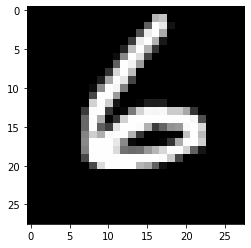

In [29]:
plt.imshow(new_data.iloc[190].values.reshape(28, 28), cmap = "gray")      # conert 28*28 gray color image
plt.show()

In [30]:
model.predict(new_data.iloc[190].values.reshape(1, 784))        # better for test dataset

array([6], dtype=int64)